# Calculating AGN Fraction
Now that I've found all the AGN in my catalogue, I need to convert this into a fraction...

### Importing Calculated Catalogues

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
cat_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/results'

In [4]:
df_delvec = pd.read_csv(f'{cat_folder}/delvec-matched-agn-cat.csv', index_col = 0)
df_calc = pd.read_csv(f'{cat_folder}/cosmos-multiwave-calc-agn-unmatched.csv', index_col = 0)

In [5]:
df_calc.agn.value_counts()

agn        356
non-agn     28
Name: agn, dtype: int64

In [6]:
df_delvec.agn.value_counts()

not-in-cat    4455
no-agn         396
MLAGN           40
HLAGN           35
Name: agn, dtype: int64

In [7]:
df_calc_red = df_calc[['id_str', 'agn']]

In [8]:
df_delvec_red = df_delvec[['id_str', 'agn']]

### Importing COSMOS Catalogue

In [9]:
df_cosmos = pd.read_csv('C:/Users/oryan/Documents/mergers-in-cosmos/data/cosmos-matched-all-eazy-df.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (466) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df_cosmos

,SourceID,id_1_2020,id_2_2020,ez_LIR_1,ez_L2800_1,ez_LIR_2,ez_L2800_2,ra_1,dec_1,clon_1,...,ssfr_med_2,ssfr_med_min68_2,ssfr_med_max68_2,ssfr_best_2,l_nu_2,l_r_2,l_k_2,dist_2,angle_2,category
0,4000705532455,816891,812427,1.461746e+10,6.532970e+09,4.550346e+08,3.795326e+08,150.679866,2.196563,10h02m43.17s,...,-8.625,-8.745,-8.435,-8.666,27.074,27.260,27.124,9.361438,123.114321,NaN
1,4000705533312,873195,872551,3.561132e+10,1.346792e+09,1.310930e+11,5.523424e+09,150.668120,2.242867,10h02m40.35s,...,-10.300,-10.368,-10.231,-10.258,28.661,29.620,29.874,2.627196,14.847254,stage3
2,4000705533383,861738,861742,5.621026e+09,5.348111e+09,2.269957e+10,2.636891e+09,150.645145,2.237538,10h02m34.83s,...,-8.440,-8.550,-8.334,-8.448,29.135,29.232,29.068,2.241379,287.399545,stage1
3,4000705539529,1284864,1281998,4.125722e+10,1.431745e+10,5.301575e+08,2.605845e+09,149.686238,2.637428,09h58m44.70s,...,-8.863,-8.987,-8.724,-8.830,28.323,28.572,28.466,3.301196,89.699137,stage1
4,4000705539941,1301188,1300267,5.449620e+07,3.591865e+08,1.352380e+09,3.631612e+08,149.702477,2.654904,09h58m48.59s,...,-8.270,-8.574,-8.054,-8.240,27.618,27.623,27.561,5.171943,338.551088,stage2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,6000536184828,1258774,1251929,1.478491e+11,1.198529e+10,NaN,NaN,150.481102,2.605657,10h01m55.46s,...,-8.641,-9.158,-8.196,-8.543,27.540,27.664,27.613,7.638679,9.844286,stage4
2459,6000536185304,1298440,1294806,1.230318e+11,6.801087e+09,2.763437e+09,4.709840e+09,150.471787,2.648527,10h01m53.23s,...,-8.614,-8.746,-8.424,-8.746,28.699,28.908,28.796,9.098925,95.953708,stage4
2460,6000536185496,1308675,1308556,3.568900e+10,7.501403e+09,5.335385e+08,7.185492e+07,150.501189,2.663116,10h02m00.29s,...,-8.471,-8.823,-8.062,-8.550,27.942,28.083,27.930,9.743745,314.274351,stage1
2461,6000536185585,1317966,1315791,6.913122e+10,1.568826e+10,1.170207e+09,7.337763e+07,150.487626,2.671314,10h01m57.03s,...,-8.632,-9.201,-8.099,-8.272,27.326,27.343,27.281,2.636796,240.396443,stage3


In [11]:
df_cat = df_cosmos[['SourceID', 'category']]

## Splitting Catalogue

In [12]:
df_cat_double = (
    df_cat
    .assign(id_str_1 = df_cat.SourceID.apply(lambda x: str(x) + '_1'))
    .assign(id_str_2 = df_cat.SourceID.apply(lambda x: str(x) + '_2'))
)

In [13]:
df_1 = df_cat_double[['category', 'id_str_1']].rename(columns = {'id_str_1' : 'id_str'})
df_2 = df_cat_double[['id_str_2', 'category']].rename(columns = {'id_str_2' : 'id_str'})

In [14]:
df_id_str = pd.concat([df_1, df_2])

## Removing Duplicates from AGN

In [15]:
df_agn = pd.concat([df_calc_red, df_delvec_red]).drop_duplicates('id_str', keep = 'first').dropna()

In [16]:
df_agn

,id_str,agn
13,4000705547180_1,agn
15,4000707045688_1,agn
21,4000707050156_1,agn
23,4000708130472_1,non-agn
35,4000713396810_1,agn
...,...,...
2458,6000536184828_2,not-in-cat
2459,6000536185304_2,not-in-cat
2460,6000536185496_2,not-in-cat
2461,6000536185585_2,not-in-cat


In [17]:
df_gals = (
    df_agn
    .assign(gal = df_agn.id_str.apply(lambda x: 'prim' if '_1' in x else 'sec'))
)

In [18]:
df_prims = (
    df_gals
    .assign(SourceID = df_gals.id_str.apply(lambda x: int(x.replace('_1', ''))))
    .query('gal == "prim"')
    .rename(columns = {'agn' : 'agn_prim'})
    .drop(columns = ['gal', 'id_str'])
)

df_secs = (
    df_gals
    .assign(SourceID = df_gals.id_str.apply(lambda x: int(x.replace('_2', ''))))
    .query('gal == "sec"')
    .rename(columns = {'agn' : 'agn_sec'})
    .drop(columns = ['gal', 'id_str'])
)

In [19]:
df_merge = df_prims.merge(df_secs, on = 'SourceID', how = 'left')

In [20]:
df_merge

,agn_prim,SourceID,agn_sec
0,agn,4000705547180,no-agn
1,agn,4000707045688,not-in-cat
2,agn,4000707050156,not-in-cat
3,non-agn,4000708130472,not-in-cat
4,agn,4000713396810,not-in-cat
...,...,...,...
2458,not-in-cat,6000536184720,not-in-cat
2459,no-agn,6000536184828,not-in-cat
2460,not-in-cat,6000536185304,not-in-cat
2461,not-in-cat,6000536185585,not-in-cat


In [21]:
df_stages_merg = (
    df_merge.merge(df_cat, on = 'SourceID', how='left')
)

In [22]:
df_stages_merg

,agn_prim,SourceID,agn_sec,category
0,agn,4000705547180,no-agn,stage4
1,agn,4000707045688,not-in-cat,stage1
2,agn,4000707050156,not-in-cat,stage4
3,non-agn,4000708130472,not-in-cat,stage4
4,agn,4000713396810,not-in-cat,stage4
...,...,...,...,...
2458,not-in-cat,6000536184720,not-in-cat,stage3
2459,no-agn,6000536184828,not-in-cat,stage4
2460,not-in-cat,6000536185304,not-in-cat,stage4
2461,not-in-cat,6000536185585,not-in-cat,stage3


### Matching to SFRs

In [23]:
sfr_df = pd.read_csv('C:/Users/oryan/Documents/mergers-in-cosmos/results/l-derived-sfr.csv', index_col = 0)

In [24]:
sfr_df_1 = (
    sfr_df
    .query('gal == "prim"')
    .rename(columns = {'id_2015' : 'id_2015_1', 'id_2020' : 'id_2020_1', 'ez_LIR' : 'ez_LIR_1', 'ez_L2800' : 'ez_L2800_1', 'sfr_best' : 'sfr_best_1', 'photoz' : 'photoz_1', 'mass_best' : 'mass_best_1', 'uv_sfr' : 'uv_sfr_1', 'ir_sfr' : 'ir_sfr_1', 'sfr_tot' : 'sfr_tot_1'})
    .drop(columns = 'gal')
)

sfr_df_2 = (
    sfr_df
    .query('gal == "sec"')
    .rename(columns = {'id_2015' : 'id_2015_2', 'id_2020' : 'id_2020_2', 'ez_LIR' : 'ez_LIR_2', 'ez_L2800' : 'ez_L2800_2', 'sfr_best' : 'sfr_best_2', 'mass_best' : 'mass_best_2', 'photoz' : 'photoz_2', 'uv_sfr' : 'uv_sfr_2', 'ir_sfr' : 'ir_sfr_2', 'sfr_tot' : 'sfr_tot_2'})
    .drop(columns = 'gal')
)

In [25]:
sfr_merg = (
    sfr_df_1
    .merge(sfr_df_2, on = 'SourceID', how = 'left')
    .dropna()
)

In [26]:
sfr_merg.dropna()

,SourceID,id_2015_1,id_2020_1,ez_LIR_1,ez_L2800_1,sfr_best_1,photoz_1,mass_best_1,uv_sfr_1,ir_sfr_1,...,id_2015_2,id_2020_2,ez_LIR_2,ez_L2800_2,sfr_best_2,photoz_2,mass_best_2,uv_sfr_2,ir_sfr_2,sfr_tot_2
0,4000705532455,590539,816891,1.461746e+10,6.532970e+09,0.508,0.536,9.355,2.112762,1.432511,...,588102.0,812427.0,4.550346e+08,3.795326e+08,-1.055,0.366,7.611,0.122741,0.044593,0.167334
1,4000705533312,621053,873195,3.561132e+10,1.346792e+09,-0.058,0.310,10.201,0.435553,3.489909,...,624589.0,872551.0,1.310930e+11,5.523424e+09,0.505,0.336,10.763,1.786275,12.847112,14.633387
2,4000705533383,617834,861738,5.621026e+09,5.348111e+09,0.132,0.621,9.578,1.729579,0.550861,...,617637.0,861742.0,2.269957e+10,2.636891e+09,1.032,0.756,9.480,0.852771,2.224557,3.077328
3,4000705539529,882817,1284864,4.125722e+10,1.431745e+10,1.319,0.698,10.102,4.630262,4.043208,...,881527.0,1281998.0,5.301575e+08,2.605845e+09,0.191,0.834,9.021,0.842730,0.051955,0.894686
4,4000705539941,893328,1301188,5.449620e+07,3.591865e+08,-1.016,0.237,8.657,0.116161,0.005341,...,892731.0,1300267.0,1.352380e+09,3.631612e+08,-0.467,0.372,7.773,0.117446,0.132533,0.249980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,6000536184720,855175,1242157,1.681280e+11,2.505052e+10,1.736,0.819,10.208,8.101338,16.476545,...,852700.0,1237624.0,5.571088e+10,3.792487e+09,0.926,0.865,9.792,1.226490,5.459666,6.686156
2343,6000536185304,887383,1298440,1.230318e+11,6.801087e+09,1.216,0.538,10.940,2.199472,12.057112,...,889072.0,1294806.0,2.763437e+09,4.709840e+09,0.580,0.480,9.326,1.523162,0.270817,1.793979
2344,6000536185496,898134,1308675,3.568900e+10,7.501403e+09,0.670,0.868,9.918,2.425954,3.497522,...,898261.0,1308556.0,5.335385e+08,7.185492e+07,-0.178,0.992,8.372,0.023238,0.052287,0.075525
2345,6000536185585,904074,1317966,6.913122e+10,1.568826e+10,1.241,0.636,9.858,5.073582,6.774860,...,901845.0,1315791.0,1.170207e+09,7.337763e+07,-0.768,0.579,7.505,0.023730,0.114680,0.138411


## Putting It All Together

In [27]:
df_stag_agn = df_stages_merg.merge(sfr_merg, on = 'SourceID', how = 'left').dropna()

In [28]:
df_stag_agn

,agn_prim,SourceID,agn_sec,category,id_2015_1,id_2020_1,ez_LIR_1,ez_L2800_1,sfr_best_1,photoz_1,...,id_2015_2,id_2020_2,ez_LIR_2,ez_L2800_2,sfr_best_2,photoz_2,mass_best_2,uv_sfr_2,ir_sfr_2,sfr_tot_2
0,agn,4000705547180,no-agn,stage4,869234.0,1264241.0,2.720751e+11,2.300378e+10,1.787,0.992,...,868444.0,1262942.0,1.176038e+12,3.085175e+09,1.632,0.959,10.688,0.997746,115.251713,116.249459
1,agn,4000707045688,not-in-cat,stage1,261034.0,275831.0,2.347857e+10,5.912312e+09,0.386,0.726,...,260061.0,274917.0,2.265165e+09,1.414163e+08,-0.458,0.636,8.459,0.045734,0.221986,0.267720
2,agn,4000707050156,not-in-cat,stage4,252257.0,261335.0,1.211659e+11,1.565232e+10,1.633,0.948,...,250213.0,258842.0,1.896145e+10,1.241762e+10,0.193,0.938,7.815,4.015857,1.858222,5.874079
3,non-agn,4000708130472,not-in-cat,stage4,409261.0,516031.0,2.707802e+10,9.195332e+09,1.091,0.442,...,407892.0,512682.0,1.458013e+07,9.335002e+07,-1.159,0.362,7.265,0.030189,0.001429,0.031618
4,agn,4000713396810,not-in-cat,stage4,618575.0,862408.0,6.313609e+10,9.552288e+09,1.149,0.724,...,616152.0,858672.0,7.301670e+09,1.887896e+09,-0.011,0.707,8.655,0.610546,0.715564,1.326109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,not-in-cat,6000536184285,not-in-cat,stage2,833486.0,1207321.0,5.555037e+10,1.422659e+10,1.277,0.824,...,832020.0,1204676.0,9.027142e+09,1.612129e+09,0.159,0.791,8.874,0.521363,0.884660,1.406023
2458,not-in-cat,6000536184720,not-in-cat,stage3,855175.0,1242157.0,1.681280e+11,2.505052e+10,1.736,0.819,...,852700.0,1237624.0,5.571088e+10,3.792487e+09,0.926,0.865,9.792,1.226490,5.459666,6.686156
2460,not-in-cat,6000536185304,not-in-cat,stage4,887383.0,1298440.0,1.230318e+11,6.801087e+09,1.216,0.538,...,889072.0,1294806.0,2.763437e+09,4.709840e+09,0.580,0.480,9.326,1.523162,0.270817,1.793979
2461,not-in-cat,6000536185585,not-in-cat,stage3,904074.0,1317966.0,6.913122e+10,1.568826e+10,1.241,0.636,...,901845.0,1315791.0,1.170207e+09,7.337763e+07,-0.768,0.579,7.505,0.023730,0.114680,0.138411


In [29]:
# df_stag_agn.to_csv('C:/Users/oryan/Documents/mergers-in-cosmos/results/l-derived-sfr-agn.csv')

## Plotting

In [30]:
df_st_agn_red = df_stag_agn[['SourceID', 'agn_prim', 'agn_sec', 'category', 'sfr_tot_1', 'sfr_tot_2', 'mass_best_1', 'mass_best_2', 'photoz_1', 'photoz_2']]

In [31]:
df_log_st = (
    df_st_agn_red
    .assign(log_sfr_1 = df_st_agn_red.sfr_tot_1.apply(lambda x: np.log10(x)))
    .assign(log_sfr_2 = df_st_agn_red.sfr_tot_2.apply(lambda x: np.log10(x)))
)

In [32]:
df_log_st

,SourceID,agn_prim,agn_sec,category,sfr_tot_1,sfr_tot_2,mass_best_1,mass_best_2,photoz_1,photoz_2,log_sfr_1,log_sfr_2
0,4000705547180,agn,no-agn,stage4,34.102782,116.249459,10.454,10.688,0.992,0.959,1.532790,2.065391
1,4000707045688,agn,not-in-cat,stage1,4.212942,0.267720,9.252,8.459,0.726,0.636,0.624585,-0.572319
2,4000707050156,agn,not-in-cat,stage4,16.936215,5.874079,9.803,7.815,0.948,0.938,1.228816,0.768940
3,4000708130472,non-agn,not-in-cat,stage4,5.627417,0.031618,9.420,7.265,0.442,0.362,0.750309,-1.500062
4,4000713396810,agn,not-in-cat,stage4,9.276547,1.326109,10.174,8.655,0.724,0.707,0.967386,0.122579
...,...,...,...,...,...,...,...,...,...,...,...,...
2456,6000536184285,not-in-cat,not-in-cat,stage2,10.044815,1.406023,10.023,8.874,0.824,0.791,1.001942,0.147992
2458,6000536184720,not-in-cat,not-in-cat,stage3,24.577883,6.686156,10.208,9.792,0.819,0.865,1.390544,0.825177
2460,6000536185304,not-in-cat,not-in-cat,stage4,14.256583,1.793979,10.940,9.326,0.538,0.480,1.154015,0.253817
2461,6000536185585,not-in-cat,not-in-cat,stage3,11.848442,0.138411,9.858,7.505,0.636,0.579,1.073661,-0.858831


In [33]:
df_log_st.agn_prim.value_counts()

not-in-cat    1584
agn            260
no-agn         231
HLAGN           25
MLAGN           21
non-agn         17
Name: agn_prim, dtype: int64

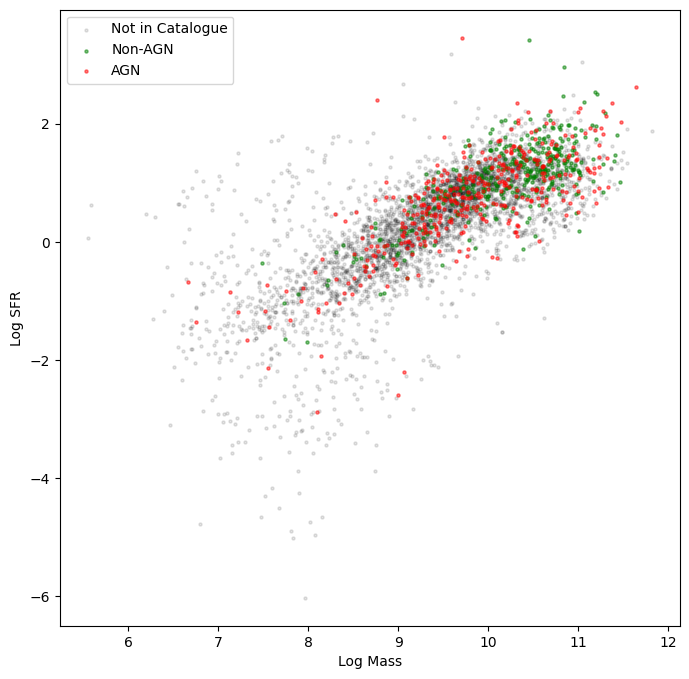

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
df_log_st.query('agn_prim == "not-in-cat"').plot.scatter(
    x = 'mass_best_1',
    y = 'log_sfr_1',
    color = 'black',
    s=5,
    alpha = 0.1,
    ax = ax
)

df_log_st.query('agn_sec == "not-in-cat"').plot.scatter(
    x = 'mass_best_2',
    y = 'log_sfr_2',
    color = 'black',
    s=5,
    alpha = 0.1,
    ax = ax,
    label = 'Not in Catalogue'
)

df_log_st.query('agn_prim == "non-agn" or agn_prim == "no-agn"').plot.scatter(
    x = 'mass_best_1',
    y = 'log_sfr_1',
    color = 'g',
    s=5,
    alpha = 0.5,
    ax = ax
)

df_log_st.query('agn_sec == "non-agn" or agn_sec == "no-agn"').plot.scatter(
    x = 'mass_best_2',
    y = 'log_sfr_2',
    color = 'g',
    s=5,
    alpha = 0.5,
    ax = ax,
    label = 'Non-AGN'
)

df_log_st.query('agn_prim != "non-agn" and agn_prim != "not-in-cat" and agn_prim != "no-agn"').plot.scatter(
    x = 'mass_best_1',
    y = 'log_sfr_1',
    color = 'r',
    s=5,
    alpha = 0.5,
    ax = ax,
)

df_log_st.query('agn_sec != "non-agn" and agn_sec != "not-in-cat" and agn_sec != "no-agn"').plot.scatter(
    x = 'mass_best_2',
    y = 'log_sfr_2',
    color = 'r',
    s=5,
    alpha = 0.5,
    ax = ax,
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'AGN'
)
plt.show()

In [35]:
def create_plot(df, ax, stage, control):
    df.query('agn_prim == "not-in-cat"').plot.scatter(
    x = 'mass_best_1',
    y = 'log_sfr_1',
    color = 'black',
    s=5,
    alpha = 0.05,
    ax = ax
    )

    df.query('agn_sec == "not-in-cat"').plot.scatter(
        x = 'mass_best_2',
        y = 'log_sfr_2',
        color = 'black',
        s=5,
        alpha = 0.051,
        ax = ax,
        label = 'Not in Catalogue'
    )

    df.query('agn_prim == "non-agn" or agn_prim == "no-agn"').plot.scatter(
        x = 'mass_best_1',
        y = 'log_sfr_1',
        color = 'g',
        s=5,
        alpha = 0.75,
        ax = ax
    )

    df.query('agn_sec == "non-agn" or agn_sec == "no-agn"').plot.scatter(
        x = 'mass_best_2',
        y = 'log_sfr_2',
        color = 'g',
        s=5,
        alpha = 0.75,
        ax = ax,
        label = 'Non-AGN'
    )

    df.query('agn_prim != "non-agn" and agn_prim != "not-in-cat" and agn_prim != "no-agn"').plot.scatter(
        x = 'mass_best_1',
        y = 'log_sfr_1',
        color = 'r',
        s=5,
        alpha = 0.75,
        ax = ax,
    )

    df.query('agn_sec != "non-agn" and agn_sec != "not-in-cat" and agn_sec != "no-agn"').plot.scatter(
        x = 'mass_best_2',
        y = 'log_sfr_2',
        color = 'r',
        s=5,
        alpha = 0.75,
        ax = ax,
        xlabel = 'Log Mass',
        ylabel = 'Log SFR',
        label = 'AGN'
    )

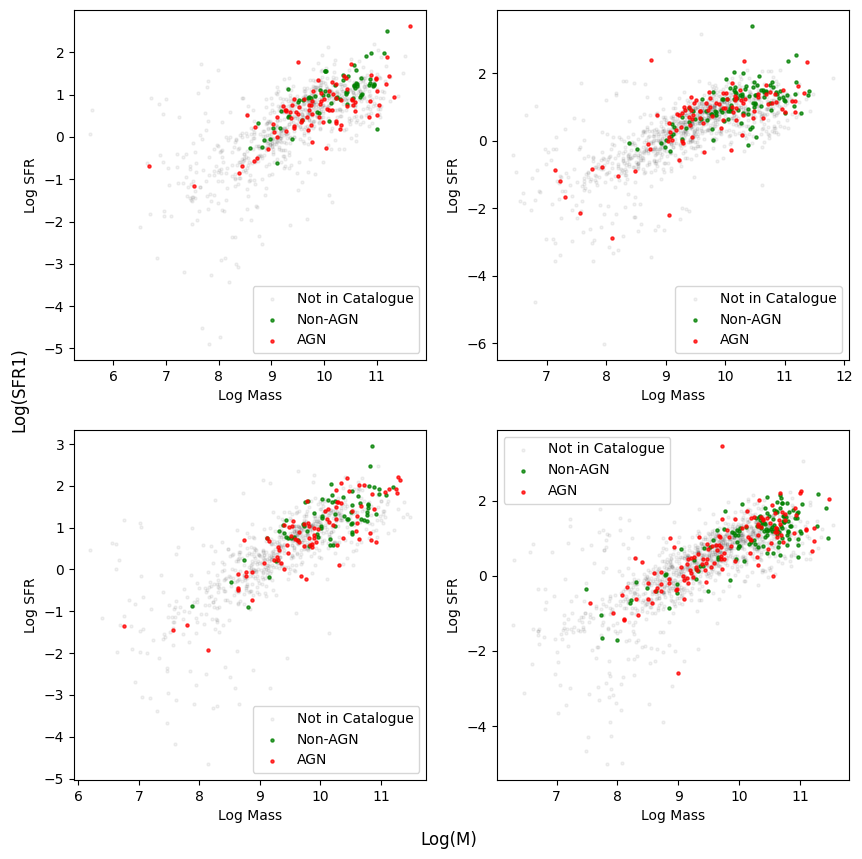

In [36]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        create_plot(df_log_st.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

## Histograming Evolution

In [37]:
df_1 = (
    df_log_st
    [['SourceID', 'agn_prim', 'category', 'sfr_tot_1', 'mass_best_1', 'photoz_1', 'log_sfr_1']]
    .rename(columns = {'agn_prim' : 'agn', 'sfr_tot_1' : 'sfr_tot', 'mass_best_1' : 'mass_best', 'photoz_1' : 'photoz', 'log_sfr_1' : 'log_sfr'})
    .assign(id_str = df_log_st.SourceID.apply(lambda x: str(x) + '_1'))
    .drop(columns = 'SourceID')
)

df_2 = (
    df_log_st
    [['SourceID', 'agn_sec', 'category', 'sfr_tot_2', 'mass_best_2', 'photoz_2', 'log_sfr_2']]
    .rename(columns = {'agn_sec' : 'agn', 'sfr_tot_2' : 'sfr_tot', 'mass_best_2' : 'mass_best', 'photoz_2' : 'photoz', 'log_sfr_2' : 'log_sfr'})
    .assign(id_str = df_log_st.SourceID.apply(lambda x: str(x) + '_2'))
    .drop(columns = 'SourceID')
)

In [38]:
df_comb = pd.concat([df_1, df_2])

In [39]:
df_comb.agn.value_counts()

not-in-cat    3514
no-agn         350
agn            322
HLAGN           34
MLAGN           32
non-agn         24
Name: agn, dtype: int64

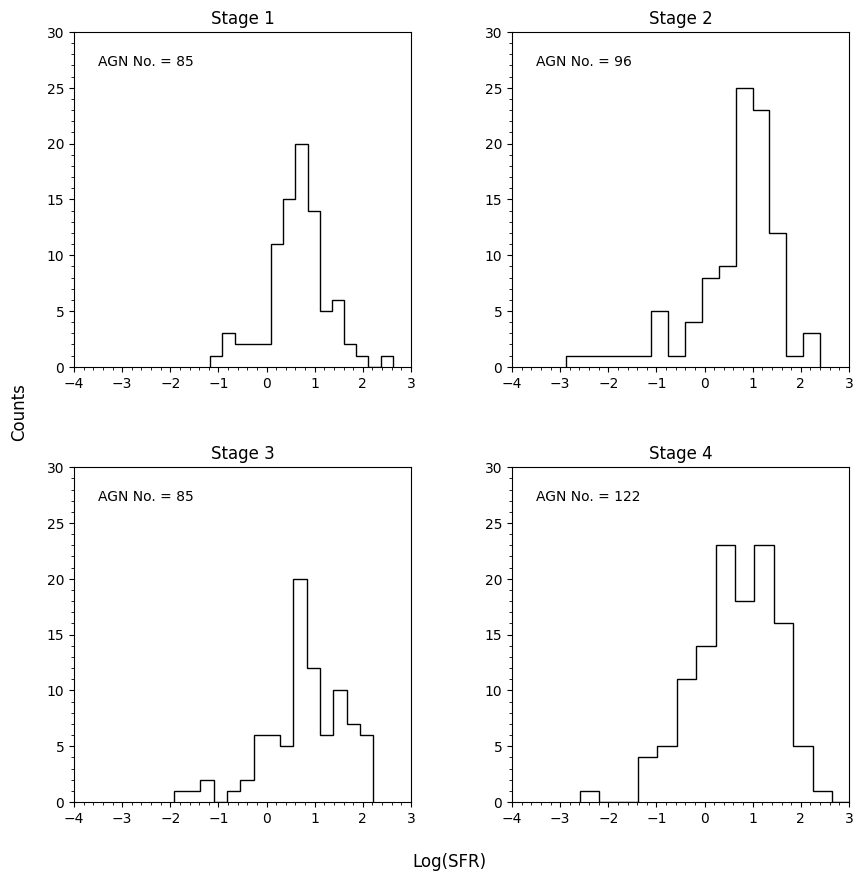

In [40]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_comb.query(f'category == "stage{counter}"')
        # df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
        #     column = 'log_sfr',
        #     bins = 25,
        #     figsize = (8,8),
        #     ax = axes[i,j],
        #     histtype = 'step',
        #     grid = False,
        #     color='black'
        # )
        
        df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"').hist(
            column = 'log_sfr',
            bins = 15,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black'
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([-4,3])
        axes[i,j].set_ylim([0,30])
        axes[i,j].text(-3.5, 27, "AGN No. = {:.0f}".format(len(df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"'))))
        counter += 1


fig.text(0.5, 0.05, 'Log(SFR)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

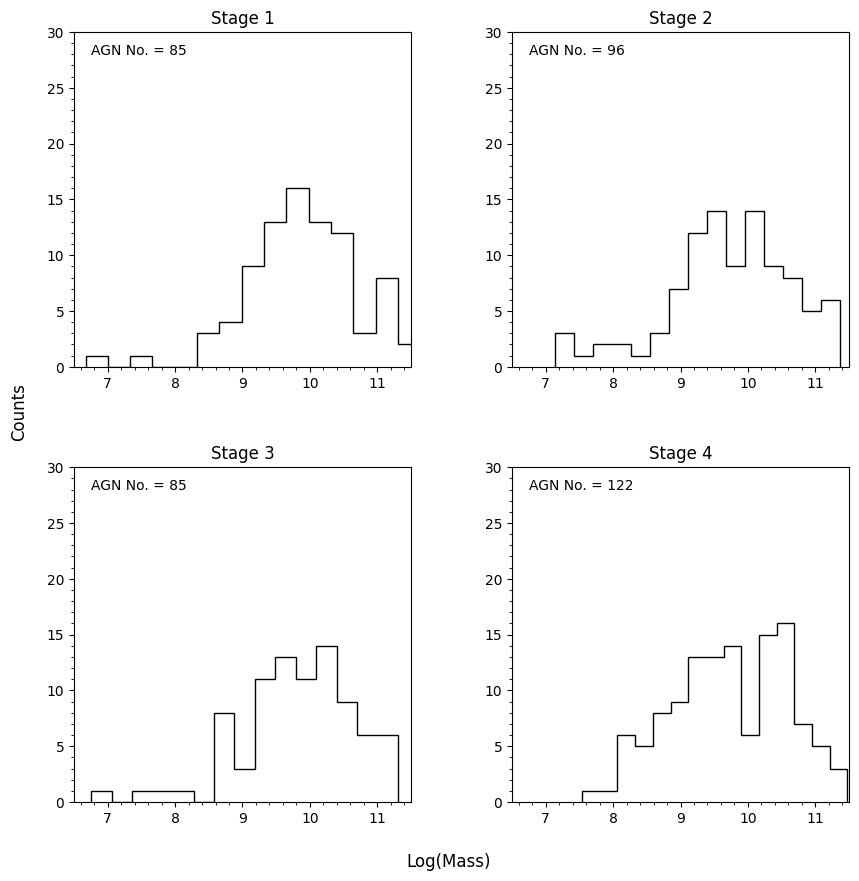

In [41]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_comb.query(f'category == "stage{counter}"')
        # df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
        #     column = 'log_sfr',
        #     bins = 25,
        #     figsize = (8,8),
        #     ax = axes[i,j],
        #     histtype = 'step',
        #     grid = False,
        #     color='black'
        # )
        
        df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"').hist(
            column = 'mass_best',
            bins = 15,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black'
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([6.5,11.5])
        axes[i,j].set_ylim([0,30])
        axes[i,j].text(6.75, 28, "AGN No. = {:.0f}".format(len(df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"'))))
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Mass)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

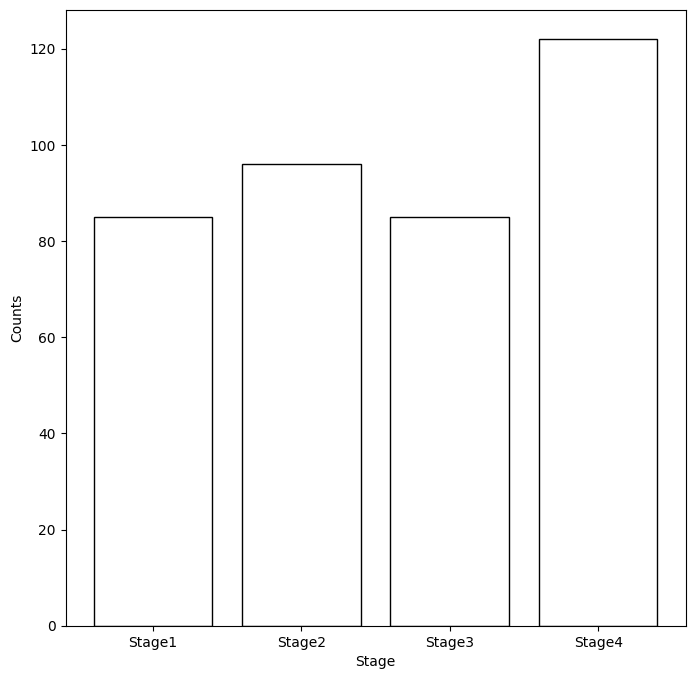

In [42]:
plt.figure(figsize = (8,8))
plt.bar(['Stage1', 'Stage2','Stage3','Stage4'], [85,96,85,122], color='black',align = 'center', fill=None)
plt.ylabel('Counts')
plt.xlabel('Stage')
plt.show()

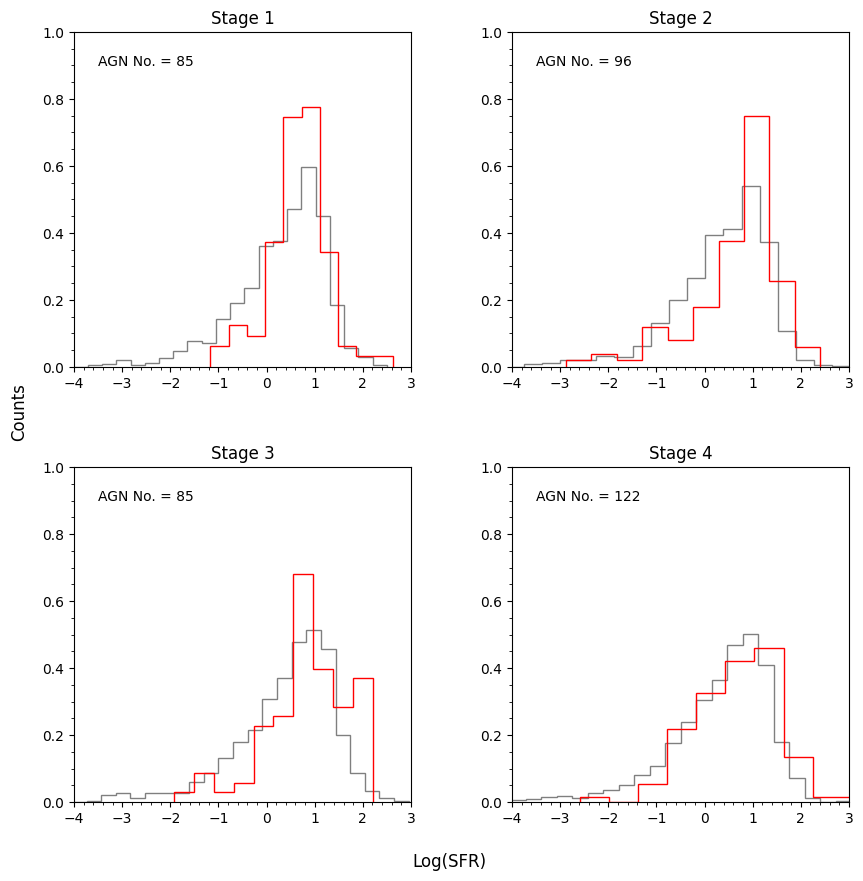

In [43]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_comb.query(f'category == "stage{counter}"')
        df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
            column = 'log_sfr',
            bins = 25,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black',
            density = True,
            alpha = 0.5
        )
        
        df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"').hist(
            column = 'log_sfr',
            bins = 10,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='red',
            density = True
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([-4,3])
        axes[i,j].set_ylim([0,1])
        axes[i,j].text(-3.5, 0.90, "AGN No. = {:.0f}".format(len(df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"'))))
        counter += 1
        
fig.text(0.5, 0.05, 'Log(SFR)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

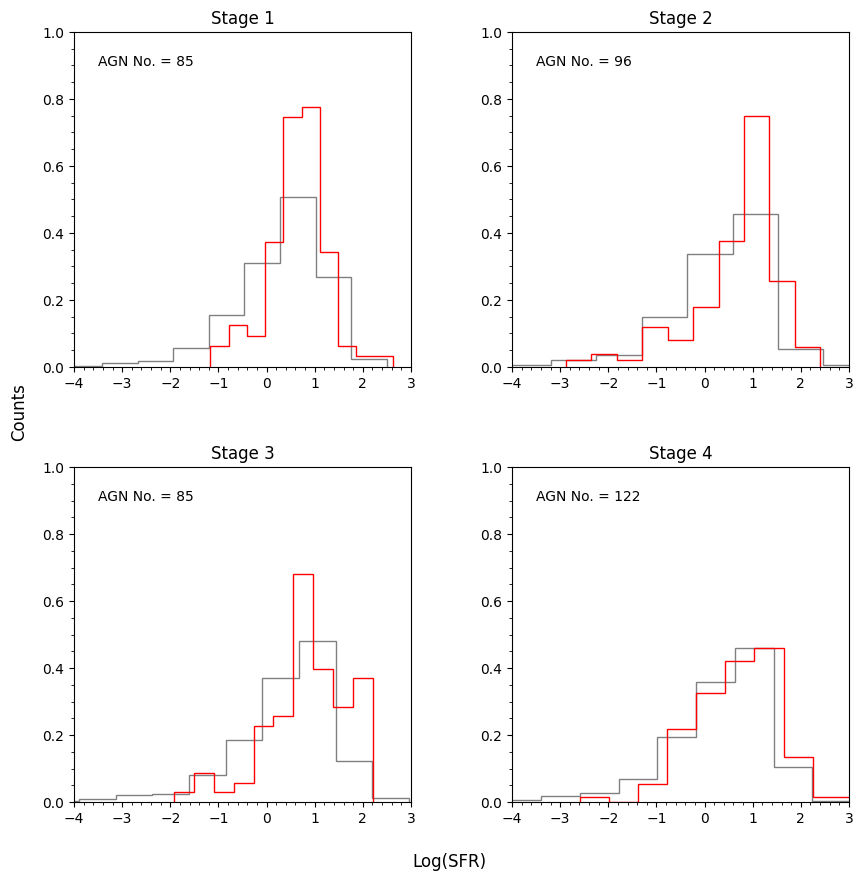

In [44]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_comb.query(f'category == "stage{counter}"')
        df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
            column = 'log_sfr',
            bins = 10,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black',
            density = True,
            alpha = 0.5
        )
        
        df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"').hist(
            column = 'log_sfr',
            bins = 10,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='red',
            density = True
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([-4,3])
        axes[i,j].set_ylim([0,1])
        axes[i,j].text(-3.5, 0.90, "AGN No. = {:.0f}".format(len(df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"'))))
        counter += 1
        

fig.text(0.5, 0.05, 'Log(SFR)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

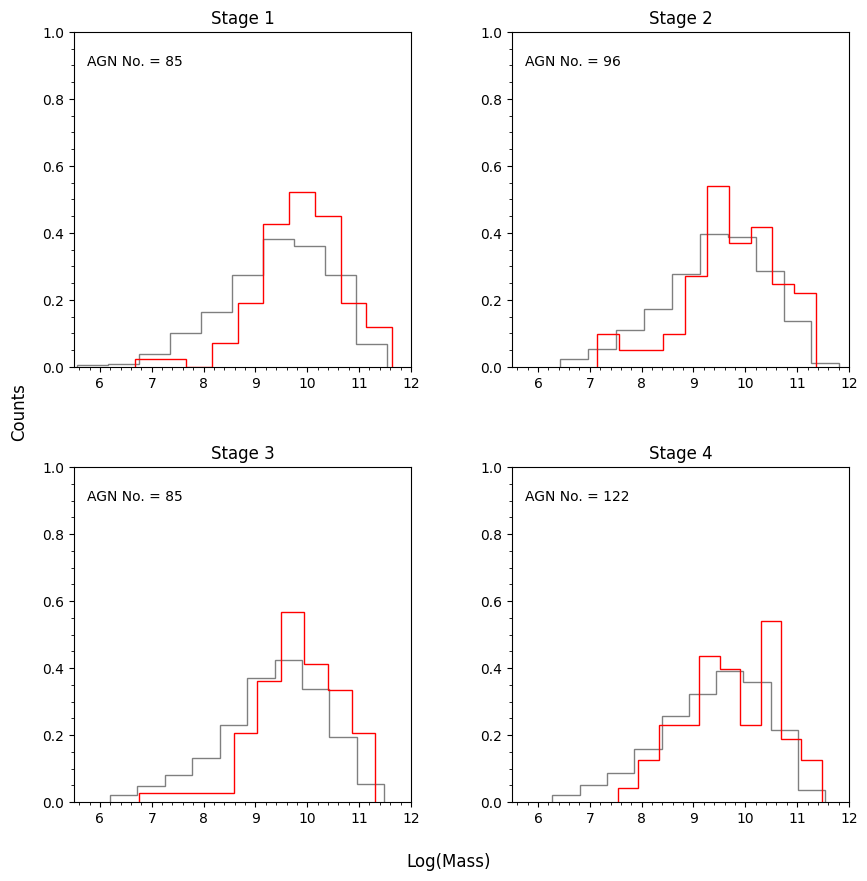

In [45]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_comb.query(f'category == "stage{counter}"')
        df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
            column = 'mass_best',
            bins = 10,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black',
            density = True,
            alpha = 0.5
        )
        
        df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"').hist(
            column = 'mass_best',
            bins = 10,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='red',
            density = True
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([5.5,12])
        axes[i,j].set_ylim([0,1])
        axes[i,j].text(5.75, 0.90, "AGN No. = {:.0f}".format(len(df_stage.query('agn == "agn" or agn == "HLAGN" or agn == "MLAGN"'))))
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Mass)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

## Checking With Total System Mass

In [46]:
def calc_mass(logm1, logm2):
    m1 = 10**logm1
    m2 = 10**logm2
    mt = m1 + m2
    logmt = np.log10(mt)
    return logmt

In [47]:
def agn_present(agn_prim, agn_sec):
    if agn_prim == 'agn' or agn_prim == 'HLAGN' or agn_prim == 'MLAGN':
        return True
    elif agn_sec == 'agn' or agn_sec == 'HLAGN' or agn_sec == 'MLAGN':
        return True
    else: 
        return False

In [48]:
df_log_st.head()

,SourceID,agn_prim,agn_sec,category,sfr_tot_1,sfr_tot_2,mass_best_1,mass_best_2,photoz_1,photoz_2,log_sfr_1,log_sfr_2
0,4000705547180,agn,no-agn,stage4,34.102782,116.249459,10.454,10.688,0.992,0.959,1.532790,2.065391
1,4000707045688,agn,not-in-cat,stage1,4.212942,0.267720,9.252,8.459,0.726,0.636,0.624585,-0.572319
2,4000707050156,agn,not-in-cat,stage4,16.936215,5.874079,9.803,7.815,0.948,0.938,1.228816,0.768940
3,4000708130472,non-agn,not-in-cat,stage4,5.627417,0.031618,9.420,7.265,0.442,0.362,0.750309,-1.500062
4,4000713396810,agn,not-in-cat,stage4,9.276547,1.326109,10.174,8.655,0.724,0.707,0.967386,0.122579


In [49]:
df_total = (
    df_log_st
    .assign(mass_total = df_log_st.apply(lambda row: calc_mass(row.mass_best_1, row.mass_best_2), axis = 1))
    .assign(sfr_total = df_log_st.apply(lambda row: calc_mass(row.log_sfr_1, row.log_sfr_2), axis = 1))
    .assign(agn_present = df_log_st.apply(lambda row: agn_present(row.agn_prim, row.agn_sec), axis = 1))
)

In [50]:
df_total.head()

,SourceID,agn_prim,agn_sec,category,sfr_tot_1,sfr_tot_2,mass_best_1,mass_best_2,photoz_1,photoz_2,log_sfr_1,log_sfr_2,mass_total,sfr_total,agn_present
0,4000705547180,agn,no-agn,stage4,34.102782,116.249459,10.454,10.688,0.992,0.959,1.532790,2.065391,10.887603,2.177110,True
1,4000707045688,agn,not-in-cat,stage1,4.212942,0.267720,9.252,8.459,0.726,0.636,0.624585,-0.572319,9.316856,0.651342,True
2,4000707050156,agn,not-in-cat,stage4,16.936215,5.874079,9.803,7.815,0.948,0.938,1.228816,0.768940,9.807442,1.358131,True
3,4000708130472,non-agn,not-in-cat,stage4,5.627417,0.031618,9.420,7.265,0.442,0.362,0.750309,-1.500062,9.423029,0.752742,False
4,4000713396810,agn,not-in-cat,stage4,9.276547,1.326109,10.174,8.655,0.724,0.707,0.967386,0.122579,10.186951,1.025415,True


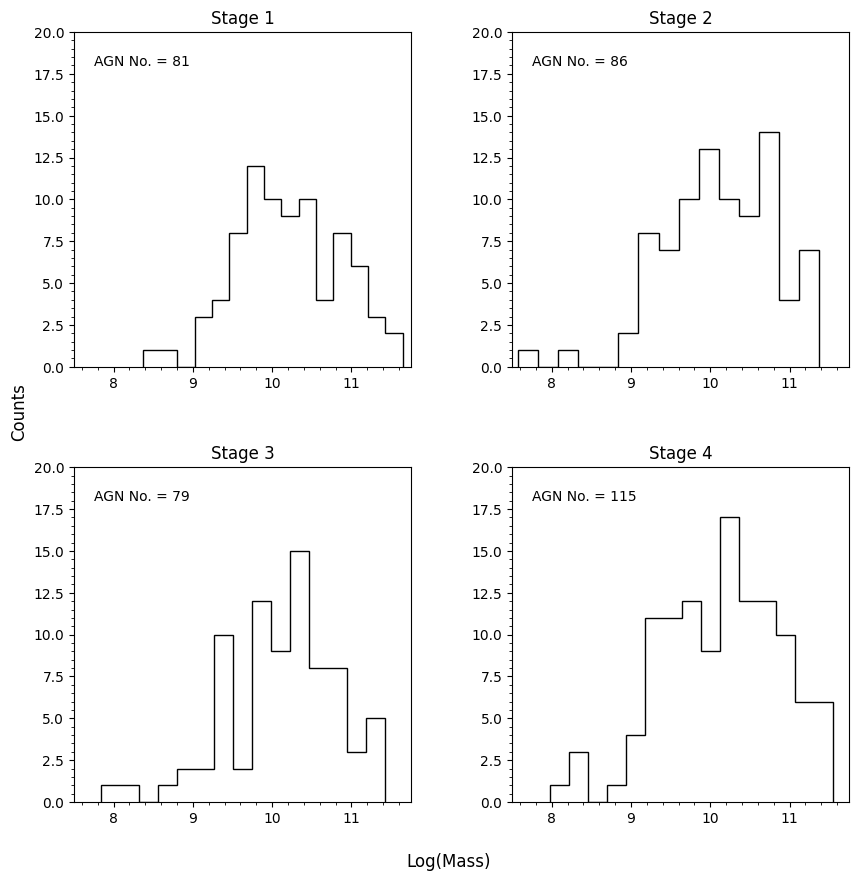

In [51]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_total.query(f'category == "stage{counter}"')
        # df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
        #     column = 'log_sfr',
        #     bins = 25,
        #     figsize = (8,8),
        #     ax = axes[i,j],
        #     histtype = 'step',
        #     grid = False,
        #     color='black'
        # )
        
        df_stage.query('agn_present == True').hist(
            column = 'mass_total',
            bins = 15,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black'
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([7.5,11.75])
        axes[i,j].set_ylim([0,20])
        axes[i,j].text(7.75, 18, "AGN No. = {:.0f}".format(len(df_stage.query('agn_present'))))

        counter += 1
        
fig.text(0.5, 0.05, 'Log(Mass)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

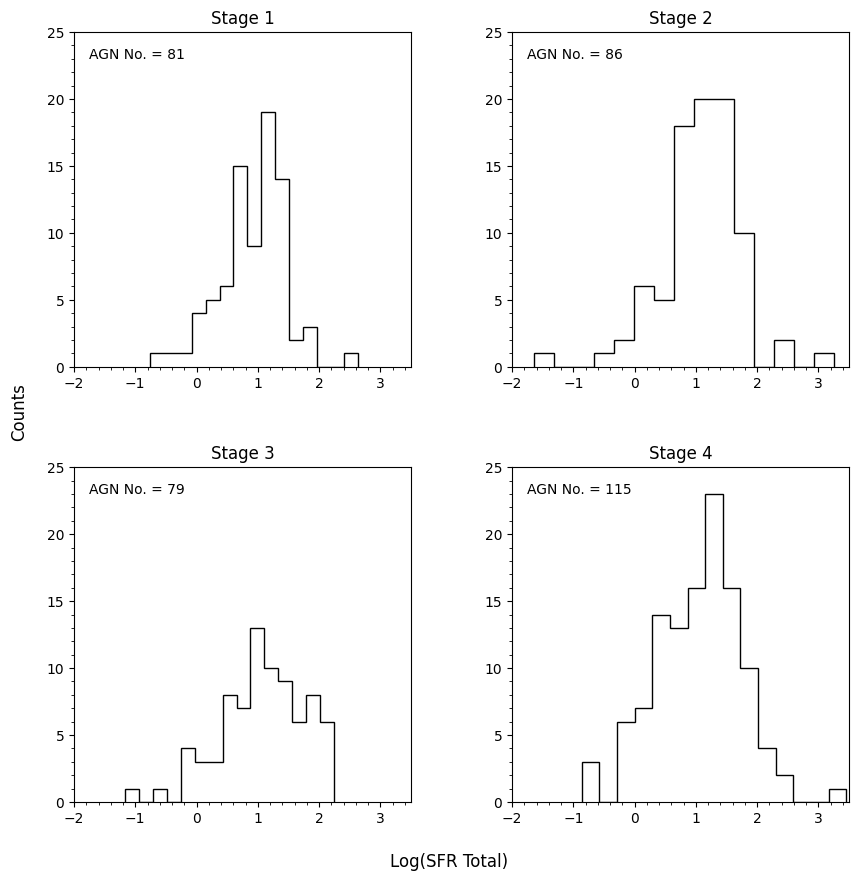

In [52]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_total.query(f'category == "stage{counter}"')
        # df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
        #     column = 'log_sfr',
        #     bins = 25,
        #     figsize = (8,8),
        #     ax = axes[i,j],
        #     histtype = 'step',
        #     grid = False,
        #     color='black'
        # )
        
        df_stage.query('agn_present == True').hist(
            column = 'sfr_total',
            bins = 15,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black'
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([-2,3.5])
        axes[i,j].set_ylim([0,25])
        axes[i,j].text(-1.75, 23, "AGN No. = {:.0f}".format(len(df_stage.query('agn_present'))))
        counter += 1
        
fig.text(0.5, 0.05, 'Log(SFR Total)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

## Checking with Mass Ratio

In [53]:
def calc_mass_ratio(logm1, logm2):
    m1 = 10**logm1
    m2 = 10**logm2
    m_ratio = m1 / m2
    if m_ratio > 1:
        m_ratio = m2 / m1
    return m_ratio

In [54]:
df_ratio = (
    df_total
    .assign(mass_ratio = df_total.apply(lambda row: calc_mass_ratio(row.mass_best_1, row.mass_best_2), axis = 1))
)

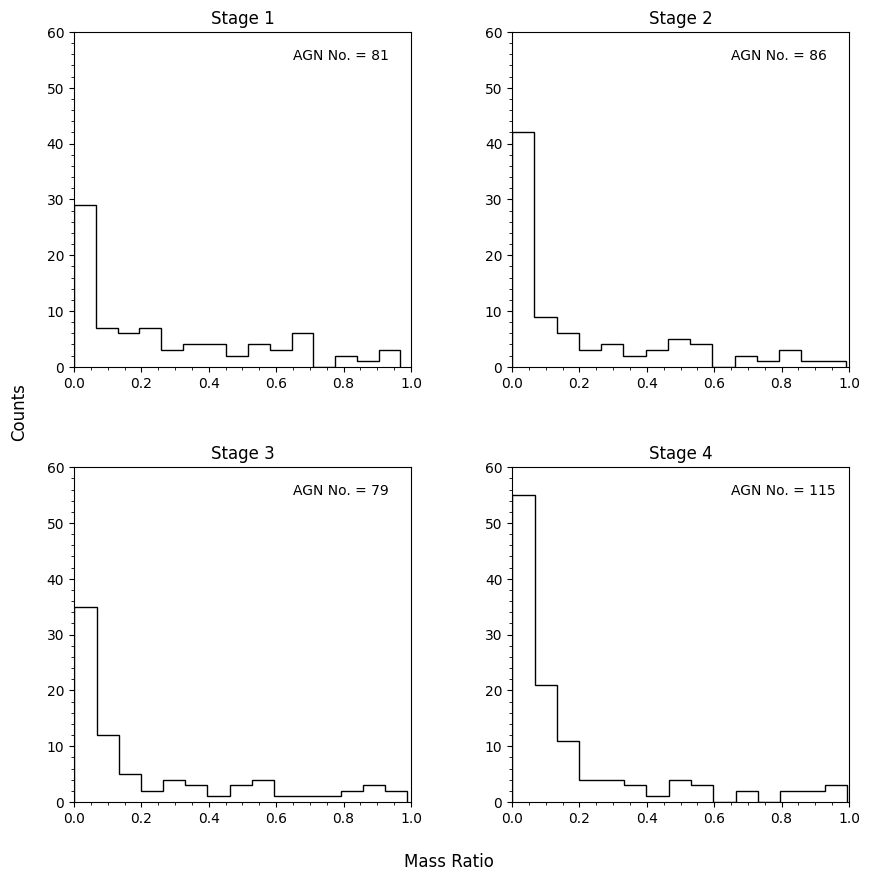

In [55]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        df_stage = df_ratio.query(f'category == "stage{counter}"')
        # df_stage.query('agn == "not-in-cat" or agn == "non-agn" or agn == "no-agn"').hist(
        #     column = 'log_sfr',
        #     bins = 25,
        #     figsize = (8,8),
        #     ax = axes[i,j],
        #     histtype = 'step',
        #     grid = False,
        #     color='black'
        # )
        
        df_stage.query('agn_present == True').hist(
            column = 'mass_ratio',
            bins = 15,
            figsize = (8,8),
            ax = axes[i,j],
            histtype = 'step',
            grid = False,
            color='black'
        )
        axes[i,j].set_title(f'Stage {counter}')
        axes[i,j].minorticks_on()
        axes[i,j].set_xlim([0, 1.0])
        axes[i,j].set_ylim([0,60])
        axes[i,j].text(0.65, 55, "AGN No. = {:.0f}".format(len(df_stage.query('agn_present'))))
        counter += 1
        
fig.text(0.5, 0.05, 'Mass Ratio', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()